In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [5]:
data = pd.read_csv('adult.data', header=None)
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
print(data.shape)
print(Y.unique())
print(data.isnull().sum().sum())

(32561, 15)
[' <=50K' ' >50K']
0


In [13]:
print('Ispitanika u klasi onih koji zaradjuju manje od 50k $ ima: ',sum(Y==Y.unique()[0]))
print('Ispitanika u klasi onih koji zaradjuju vise od 50k $ ima: ',sum(Y==Y.unique()[1]))

Ispitanika u klasi onih koji zaradjuju manje od 50k $ ima:  24720
Ispitanika u klasi onih koji zaradjuju vise od 50k $ ima:  7841


In [21]:
catg_list = X.dtypes[X.dtypes == "object"].index.tolist() 
X1=pd.DataFrame()
for catg in catg_list:
    X_temp = pd.get_dummies(X[catg], prefix=catg).iloc[:, :-1]
    X1 = pd.concat([X1, X_temp], axis=1)
num_list = X.dtypes[X.dtypes != "object"].index.tolist()
X1 = pd.concat([X1, X[num_list]], axis=1)
print(X1.columns)
print(X1.shape)
X1.head()

Index([                          '1_ ?',                 '1_ Federal-gov',
                         '1_ Local-gov',                '1_ Never-worked',
                           '1_ Private',                '1_ Self-emp-inc',
                  '1_ Self-emp-not-inc',                   '1_ State-gov',
                              '3_ 10th',                        '3_ 11th',
                              '3_ 12th',                     '3_ 1st-4th',
                           '3_ 5th-6th',                     '3_ 7th-8th',
                               '3_ 9th',                  '3_ Assoc-acdm',
                         '3_ Assoc-voc',                   '3_ Bachelors',
                         '3_ Doctorate',                     '3_ HS-grad',
                           '3_ Masters',                   '3_ Preschool',
                       '3_ Prof-school',                    '5_ Divorced',
                 '5_ Married-AF-spouse',          '5_ Married-civ-spouse',
             '5_ Married-

,1_ ?,1_ Federal-gov,1_ Local-gov,1_ Never-worked,1_ Private,1_ Self-emp-inc,1_ Self-emp-not-inc,1_ State-gov,3_ 10th,3_ 11th,...,13_ Thailand,13_ Trinadad&Tobago,13_ United-States,13_ Vietnam,0,2,4,10,11,12
0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,39,77516,13,2174,0,40
1,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,50,83311,13,0,0,13
2,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,38,215646,9,0,0,40
3,0,0,0,0,1,0,0,0,0,1,...,0,0,1,0,53,234721,7,0,0,40
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,28,338409,13,0,0,40


In [25]:
Y1=Y
Y1.loc[Y==Y.unique()[0]]=0
Y1.loc[Y==Y.unique()[1]]=1
Y1.head()

0    0
1    0
2    0
3    0
4    0
Name: 14, dtype: int64

In [33]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.15, stratify=Y1, random_state=46)

[[4029  174]
 [ 657  676]]
[[4014  188]
 [ 680  653]]
[[4004  198]
 [ 648  685]]
[[3955  247]
 [ 612  721]]
[[4001  201]
 [ 664  669]]
finalna matrica za stablo odluke je: 
[[20003.  1008.]
 [ 3261.  3404.]]
procenat pogođenih uzoraka je:  84.57508310449487 %


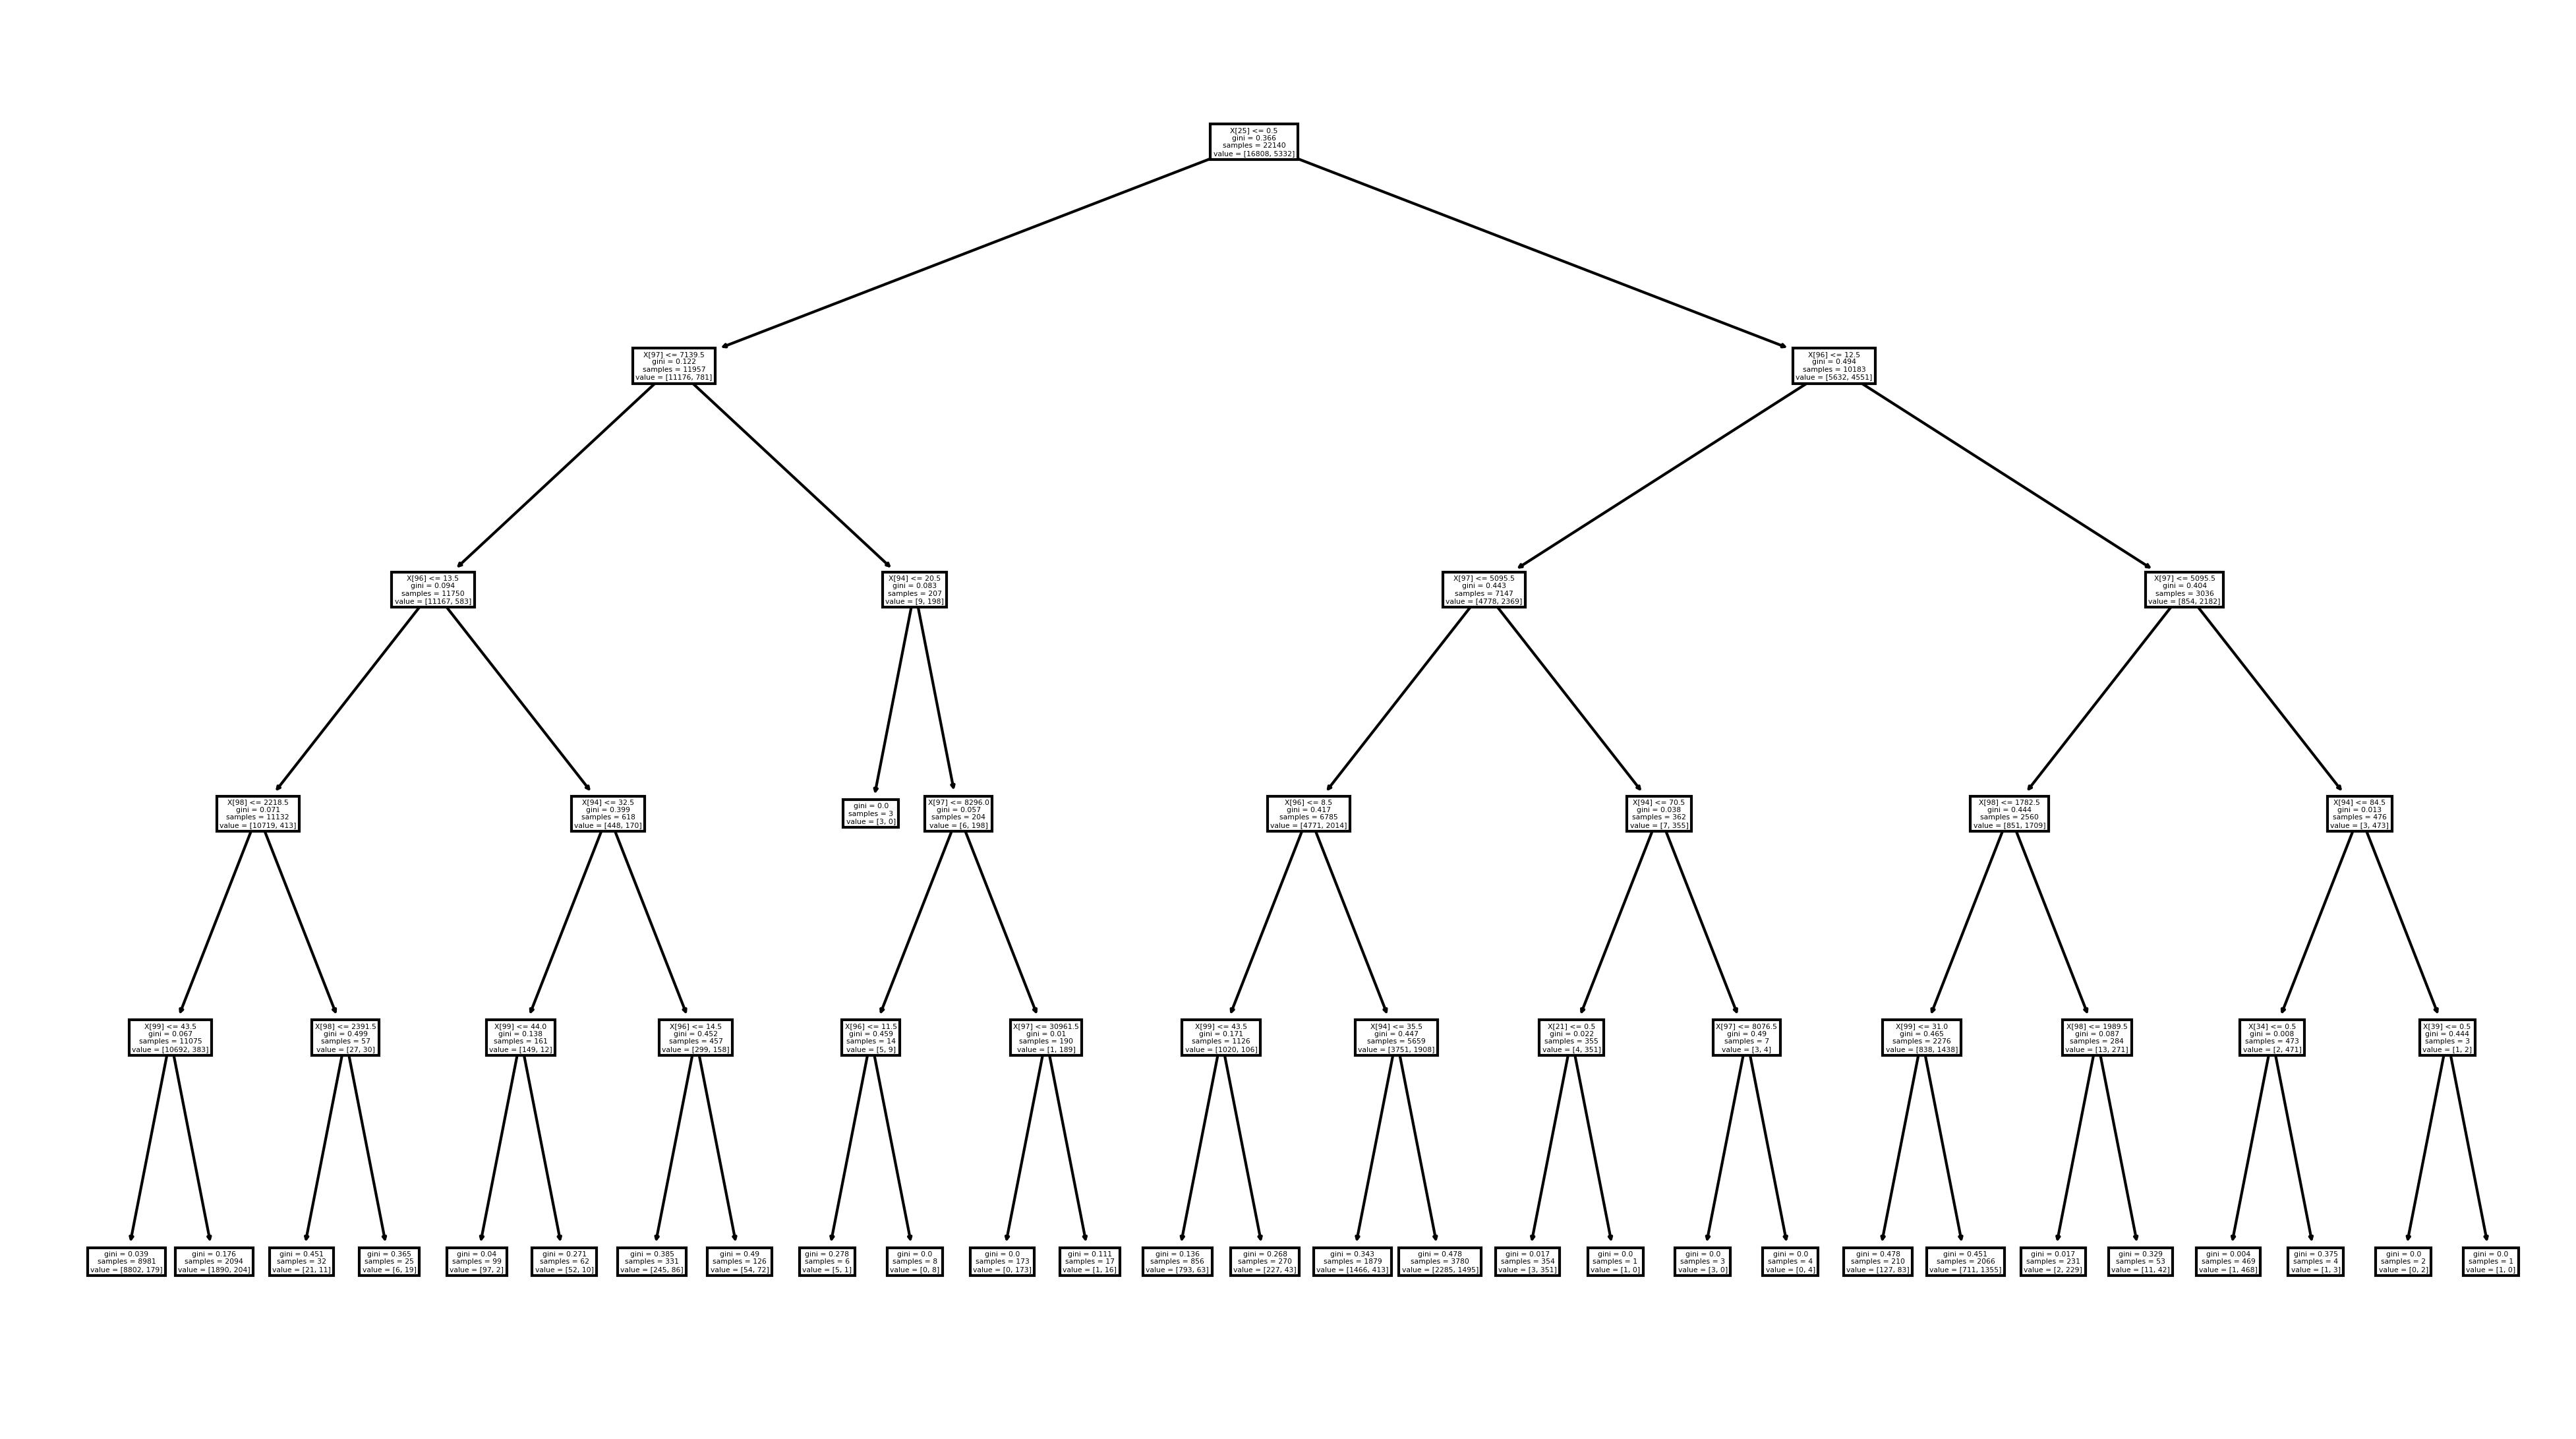

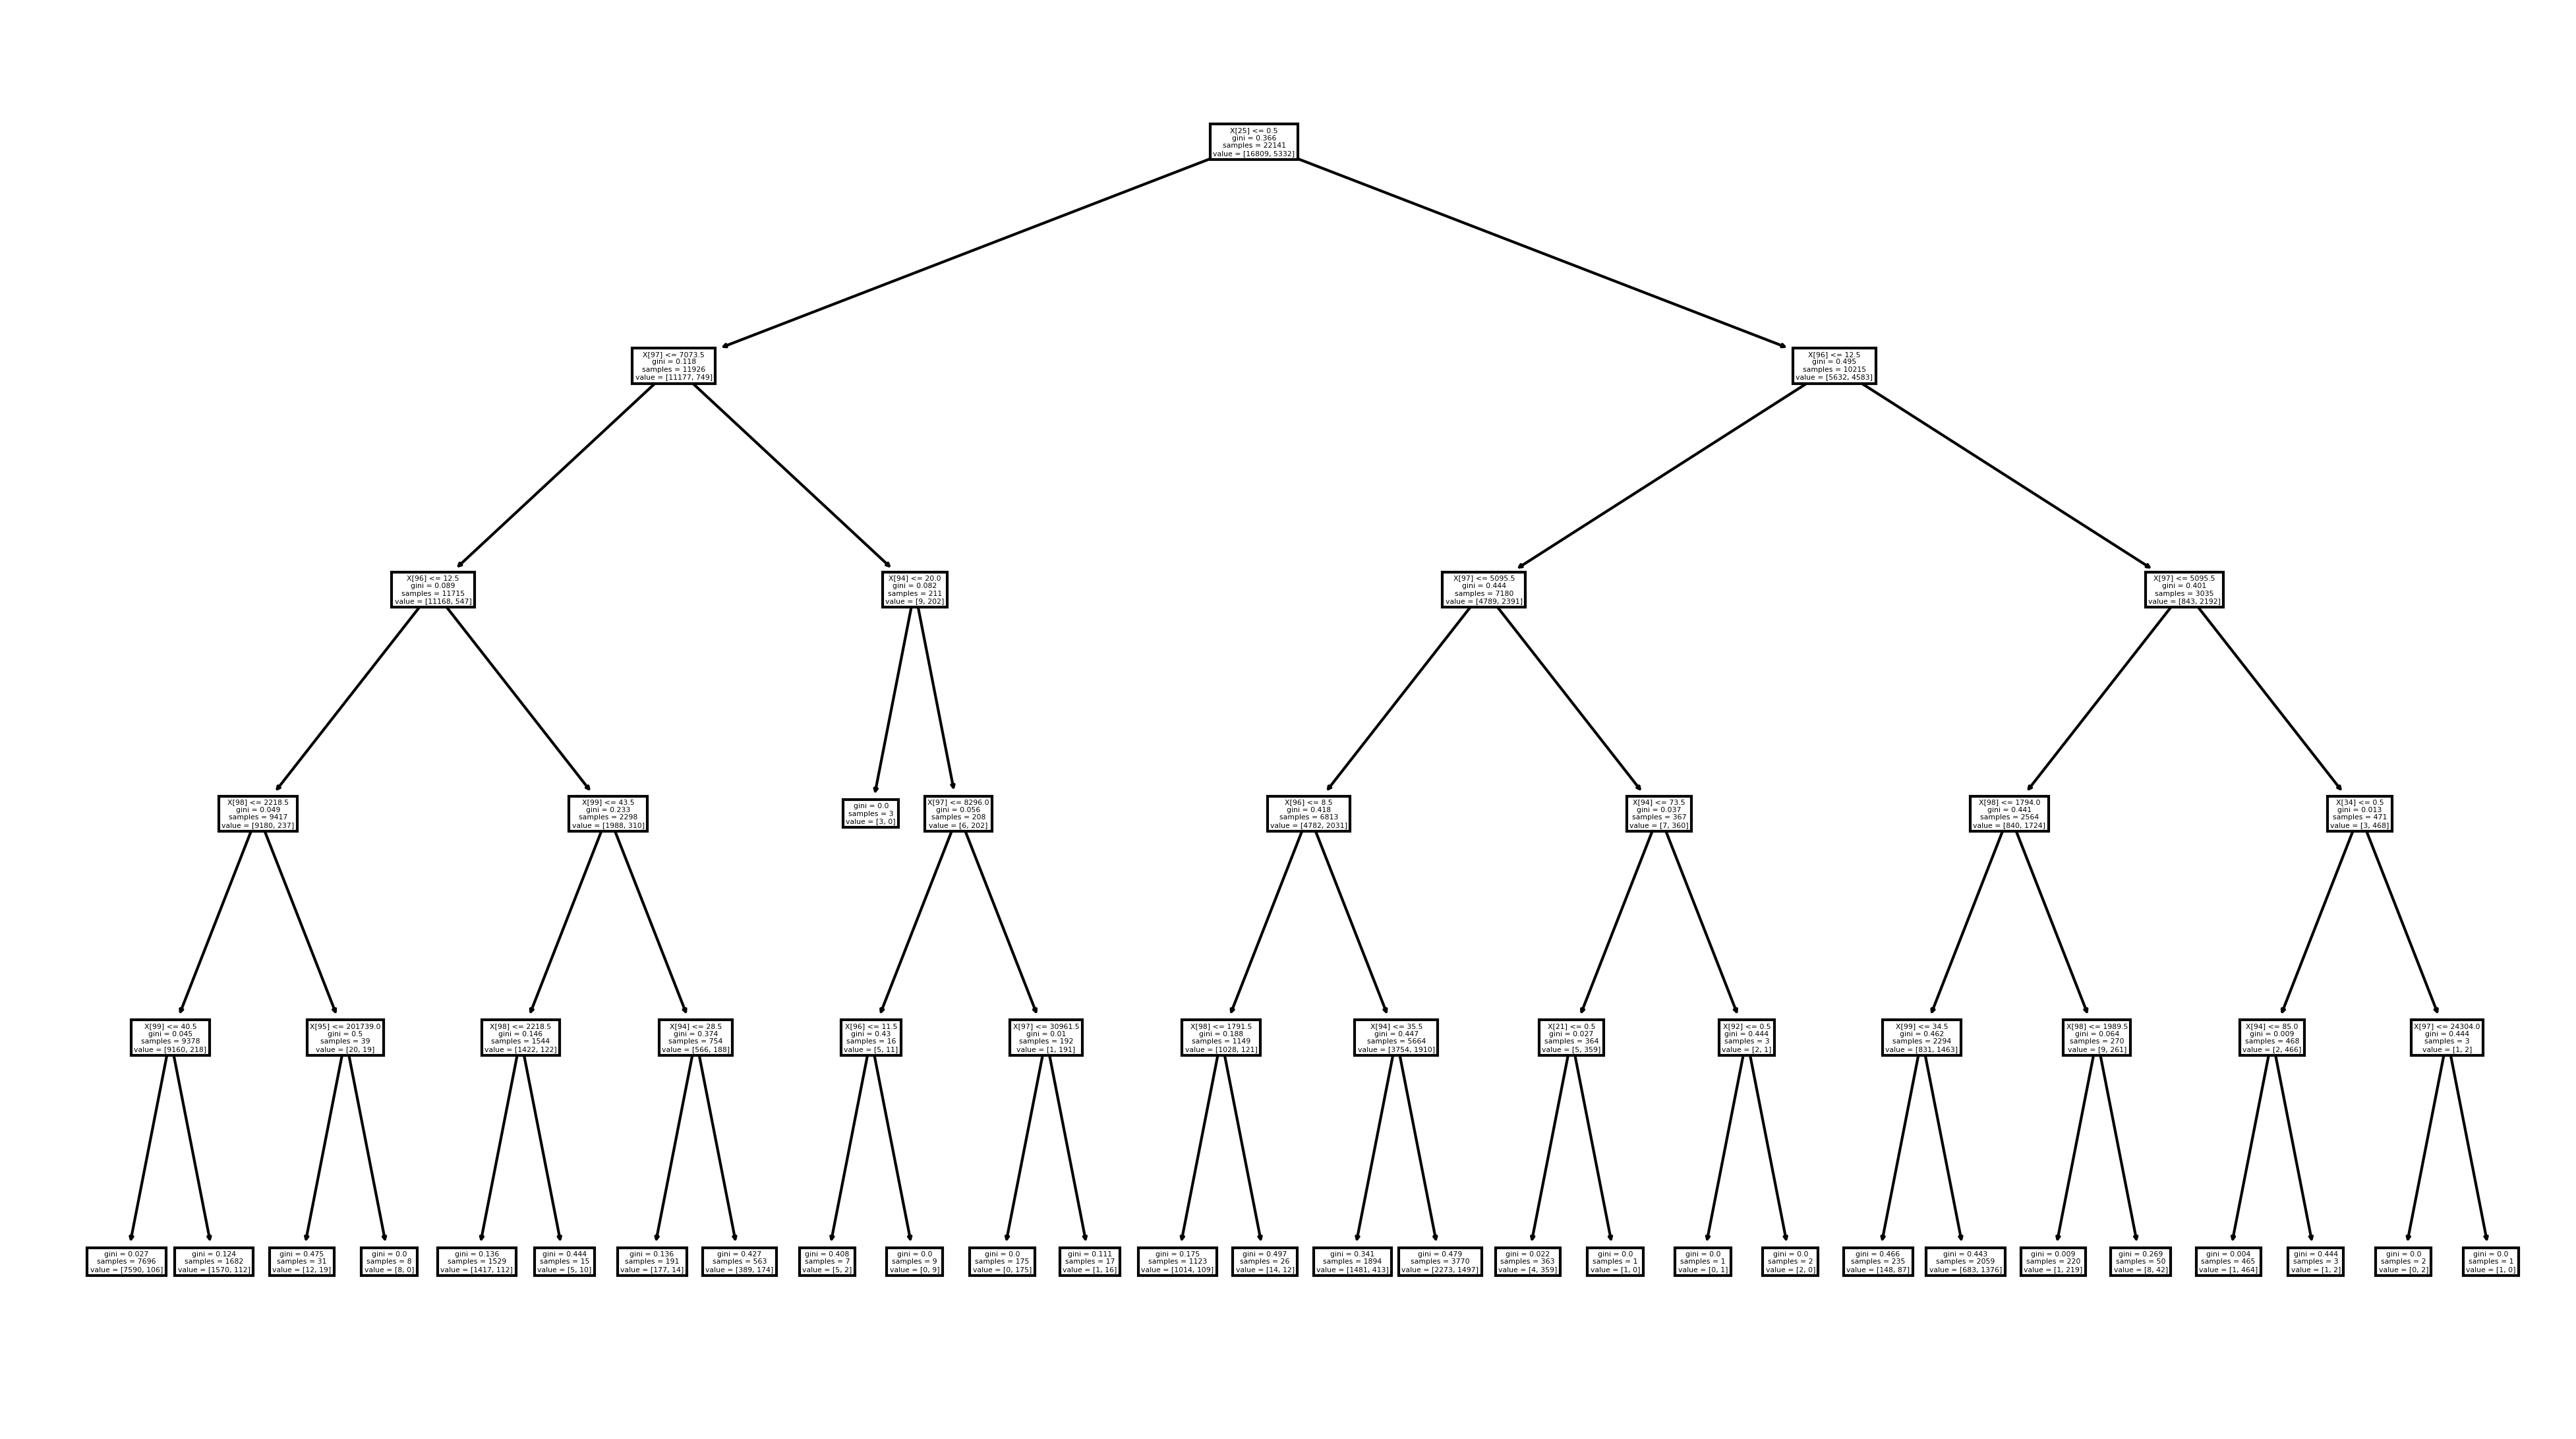

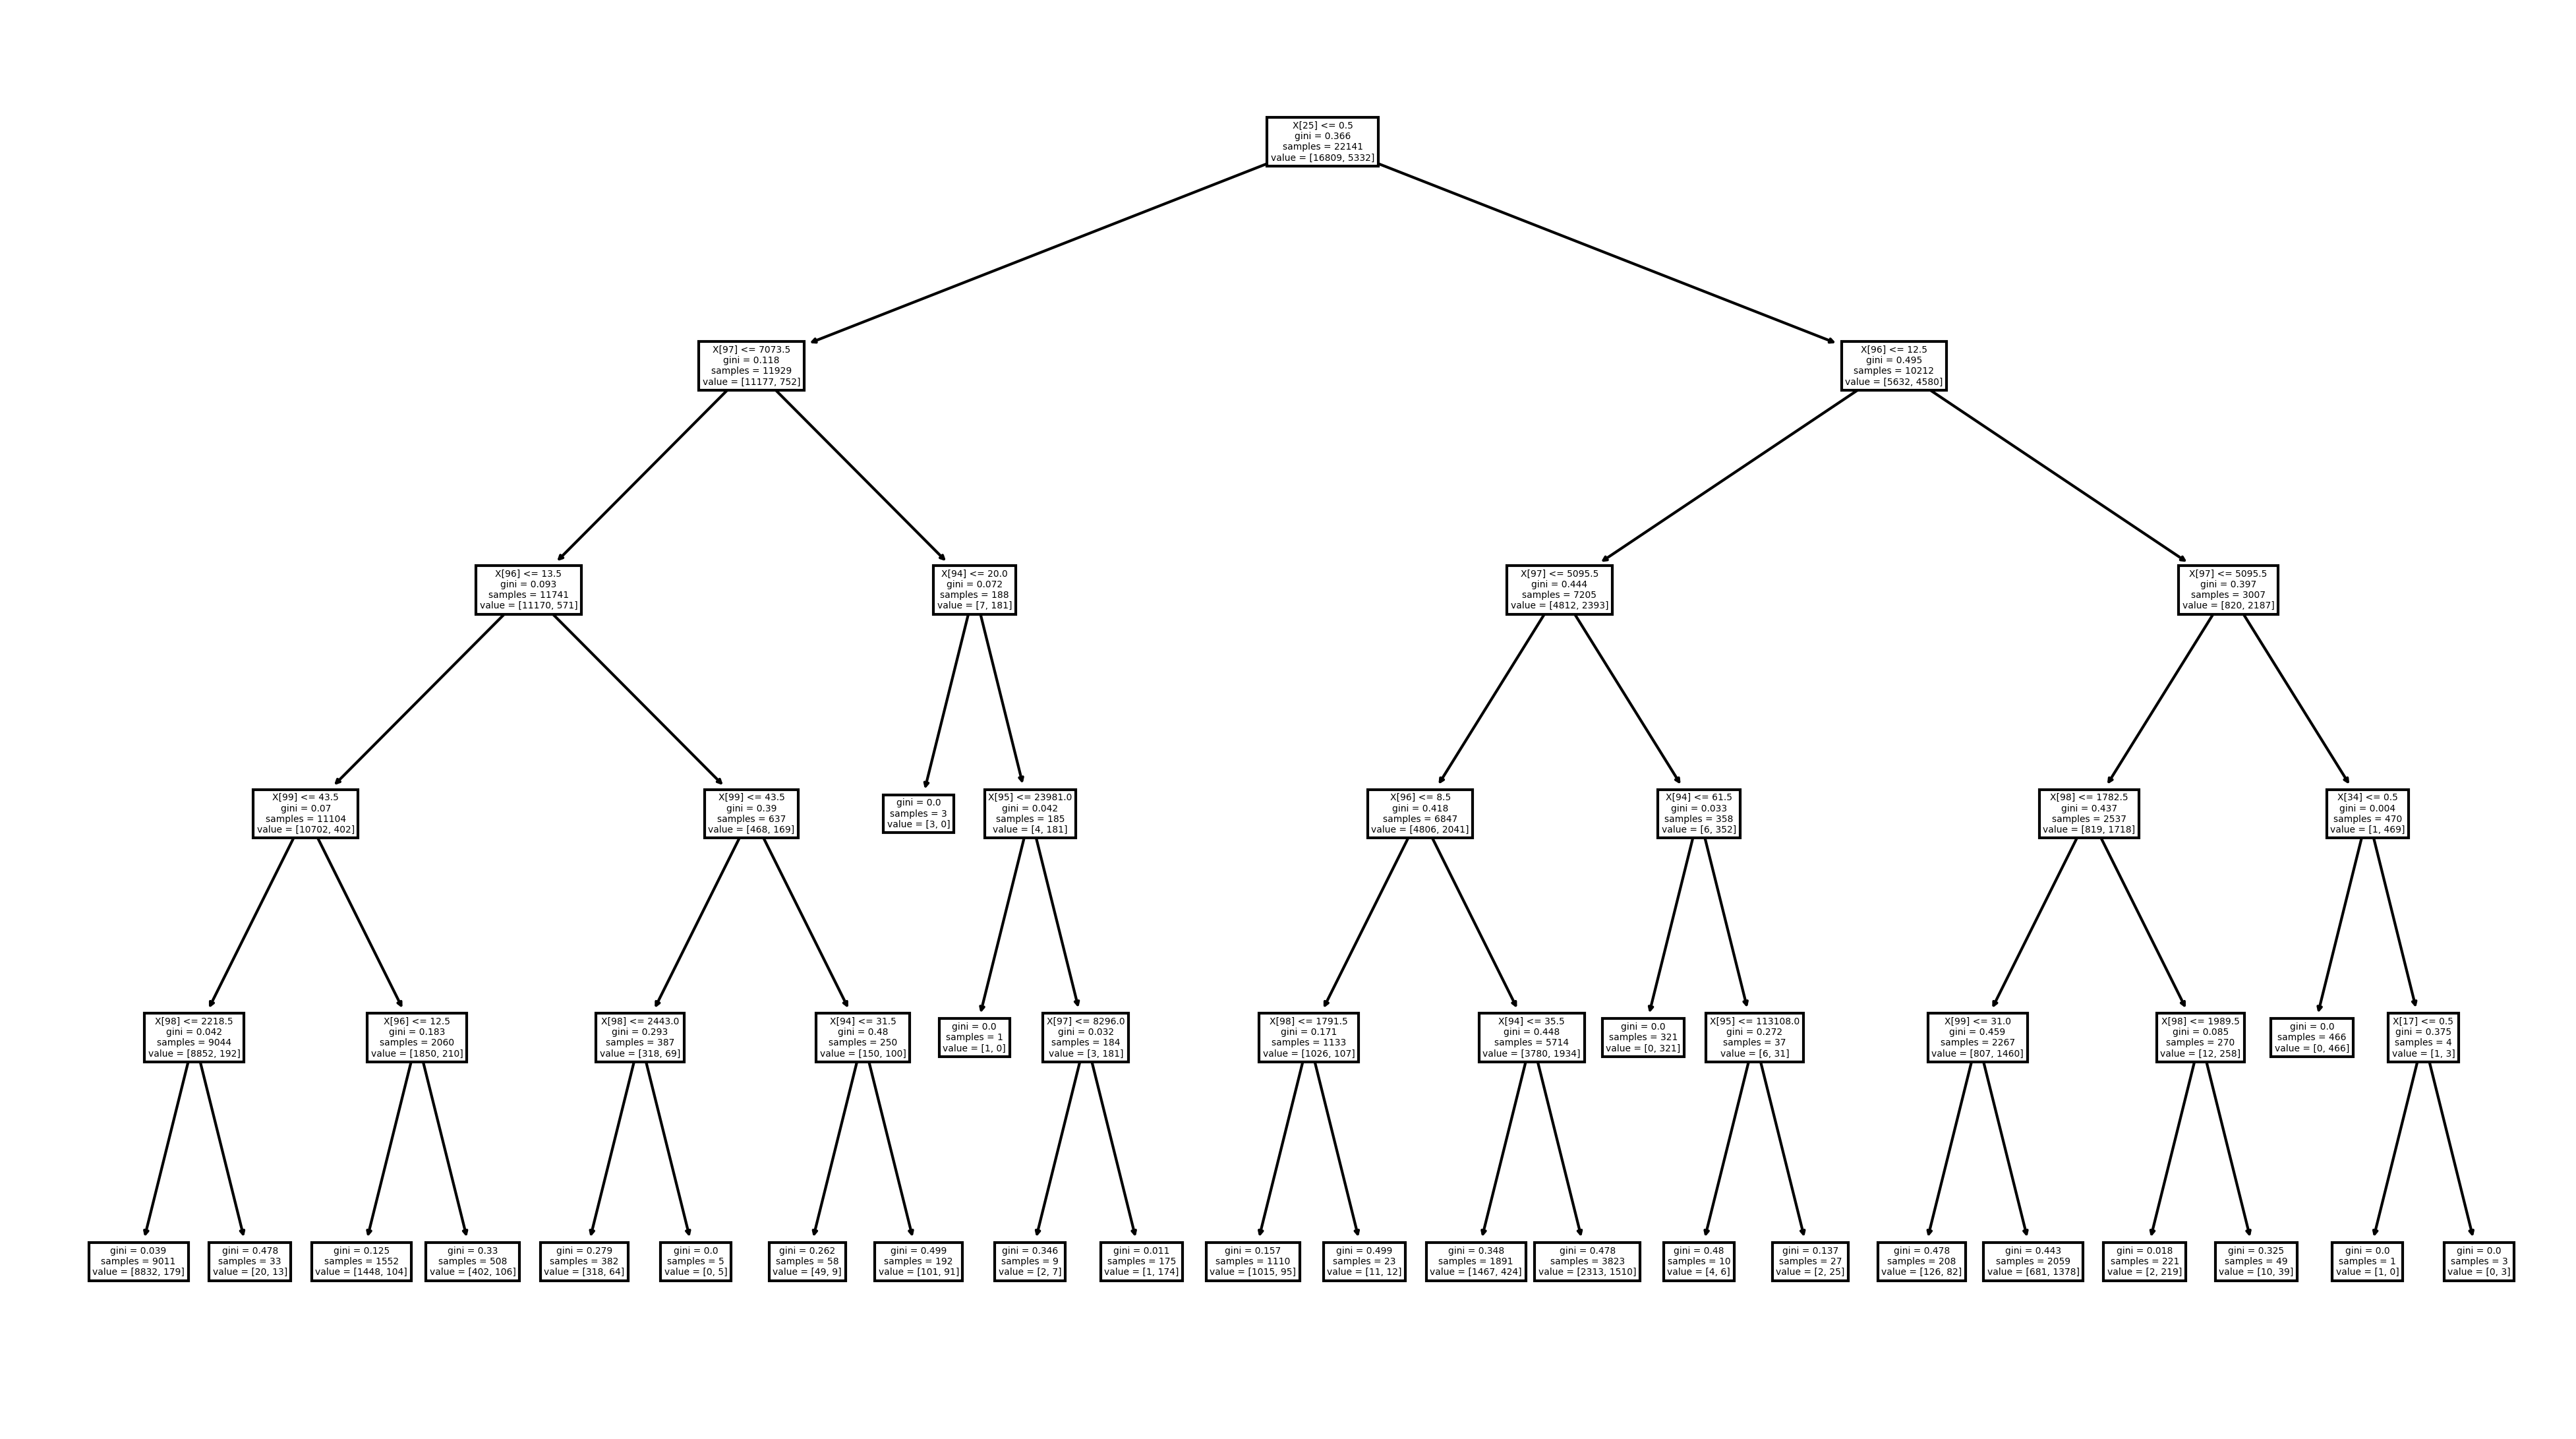

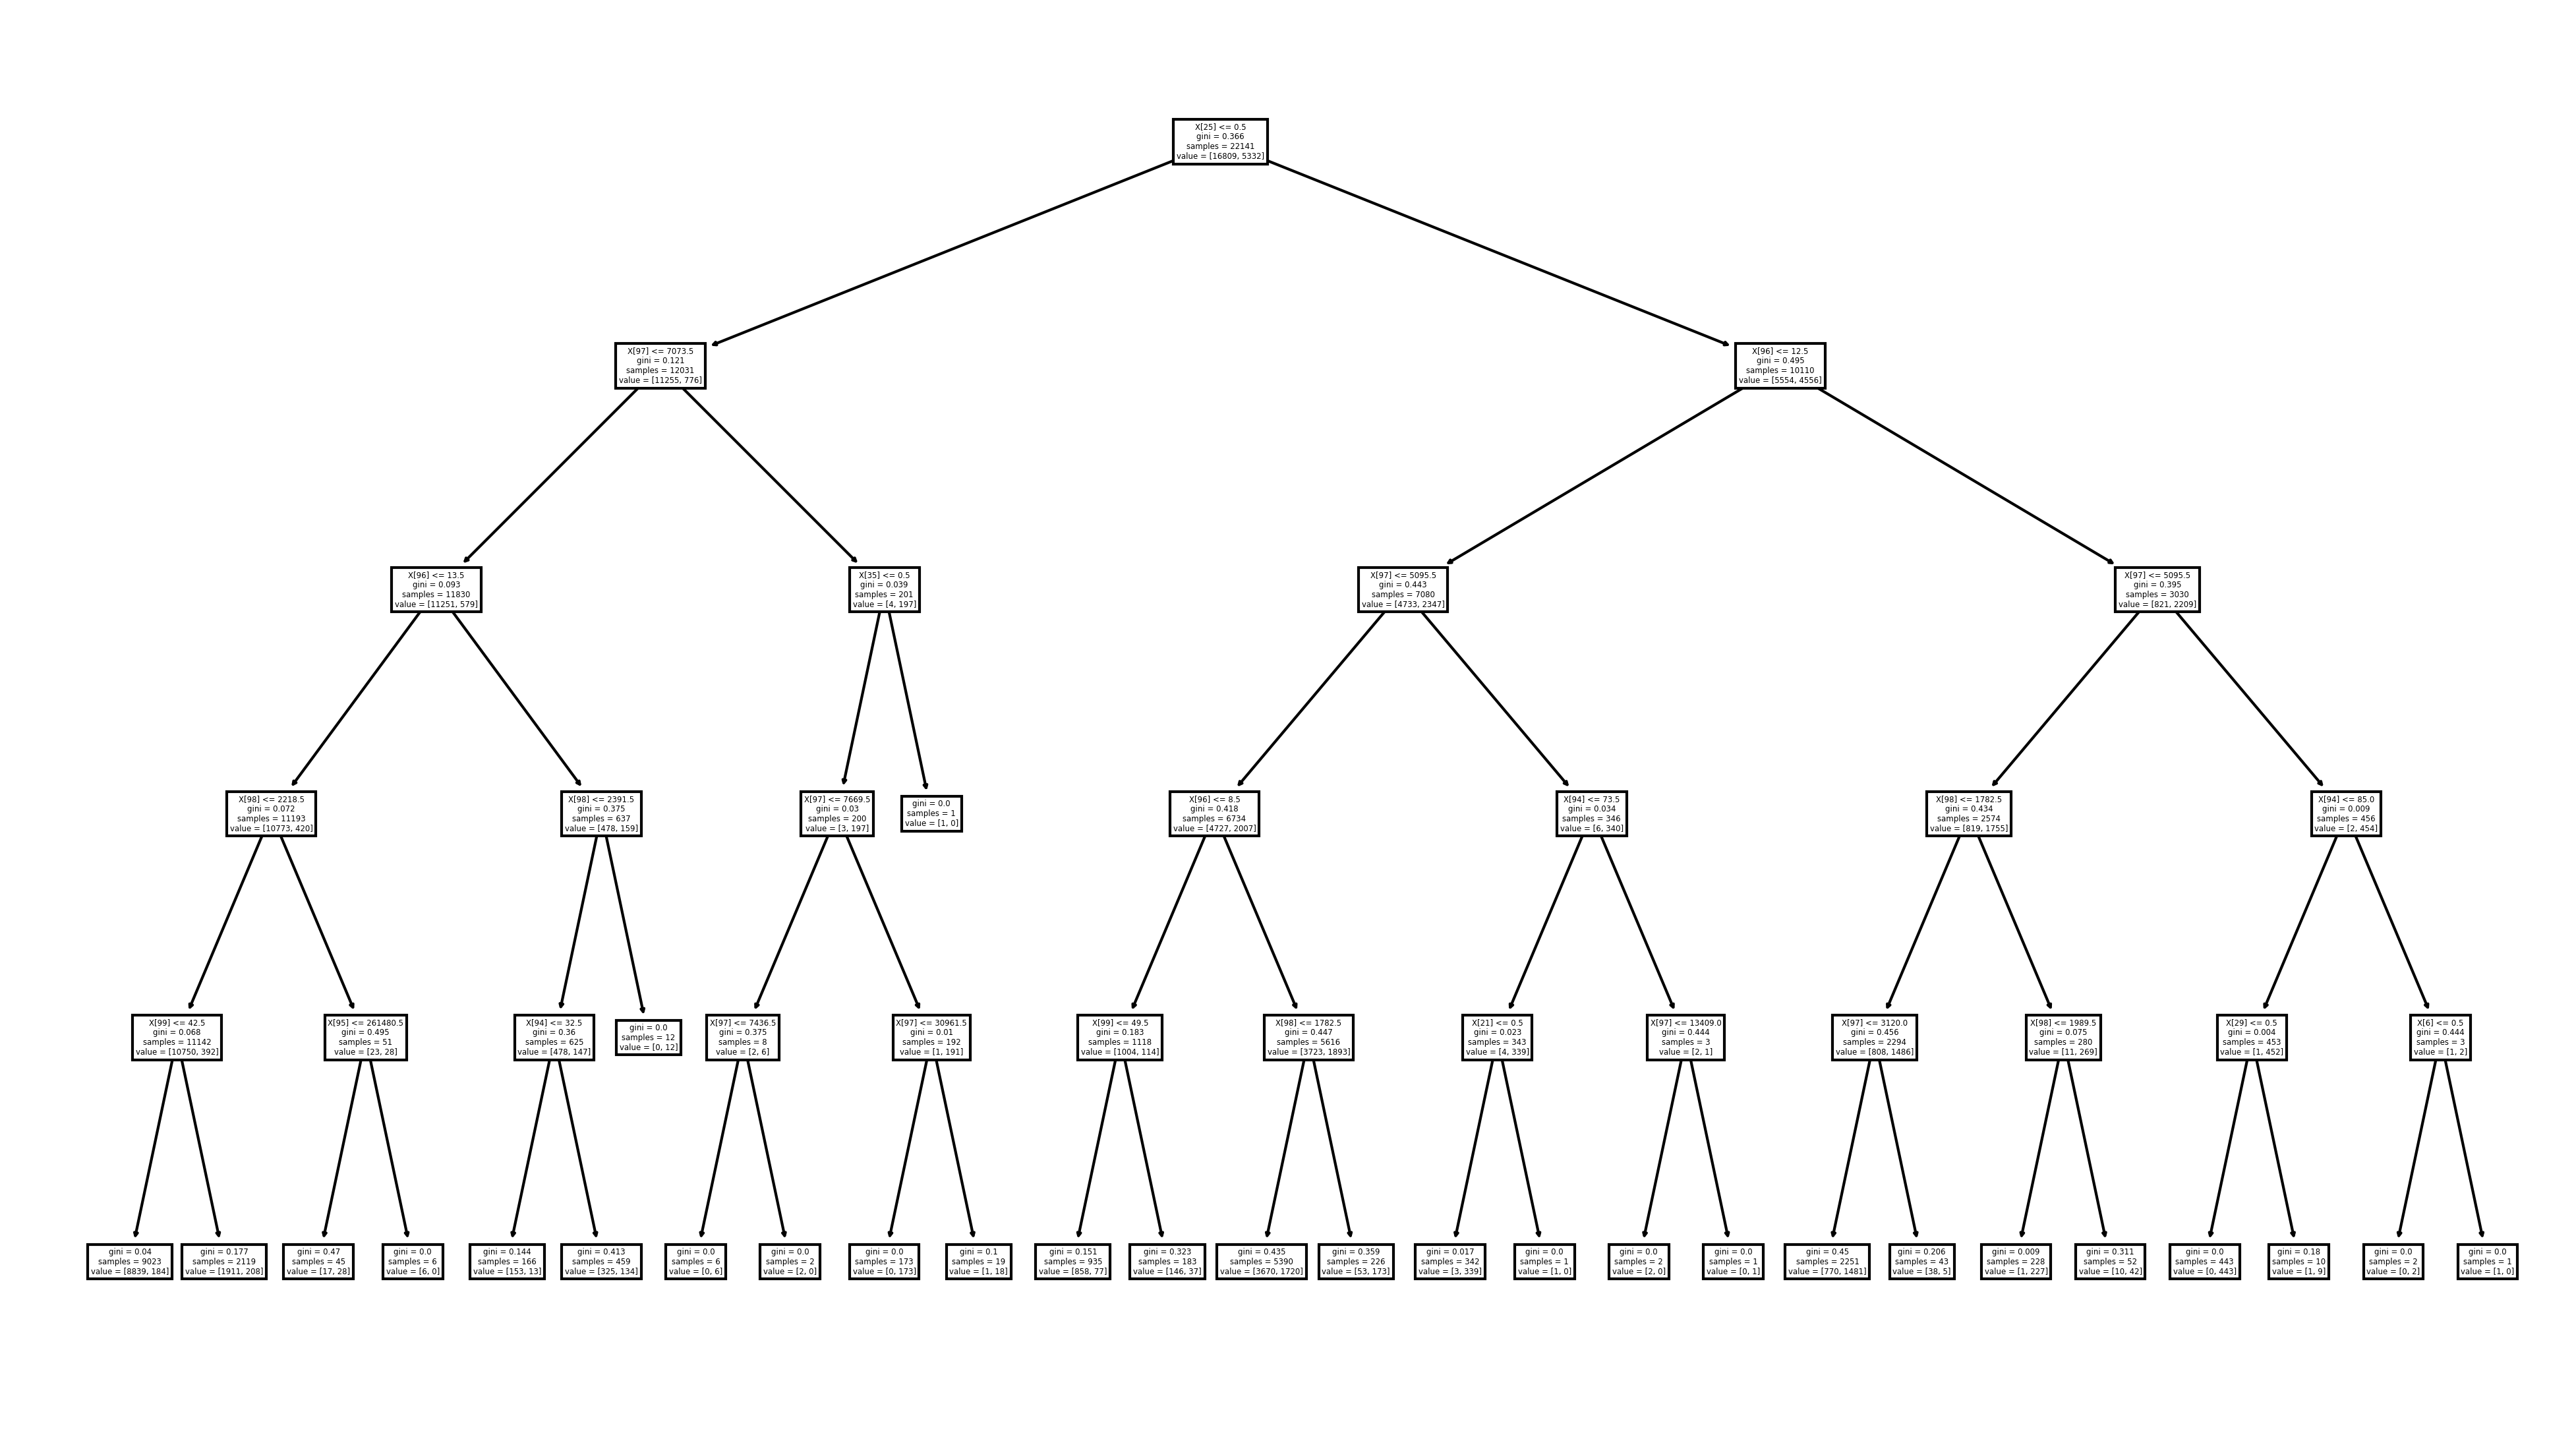

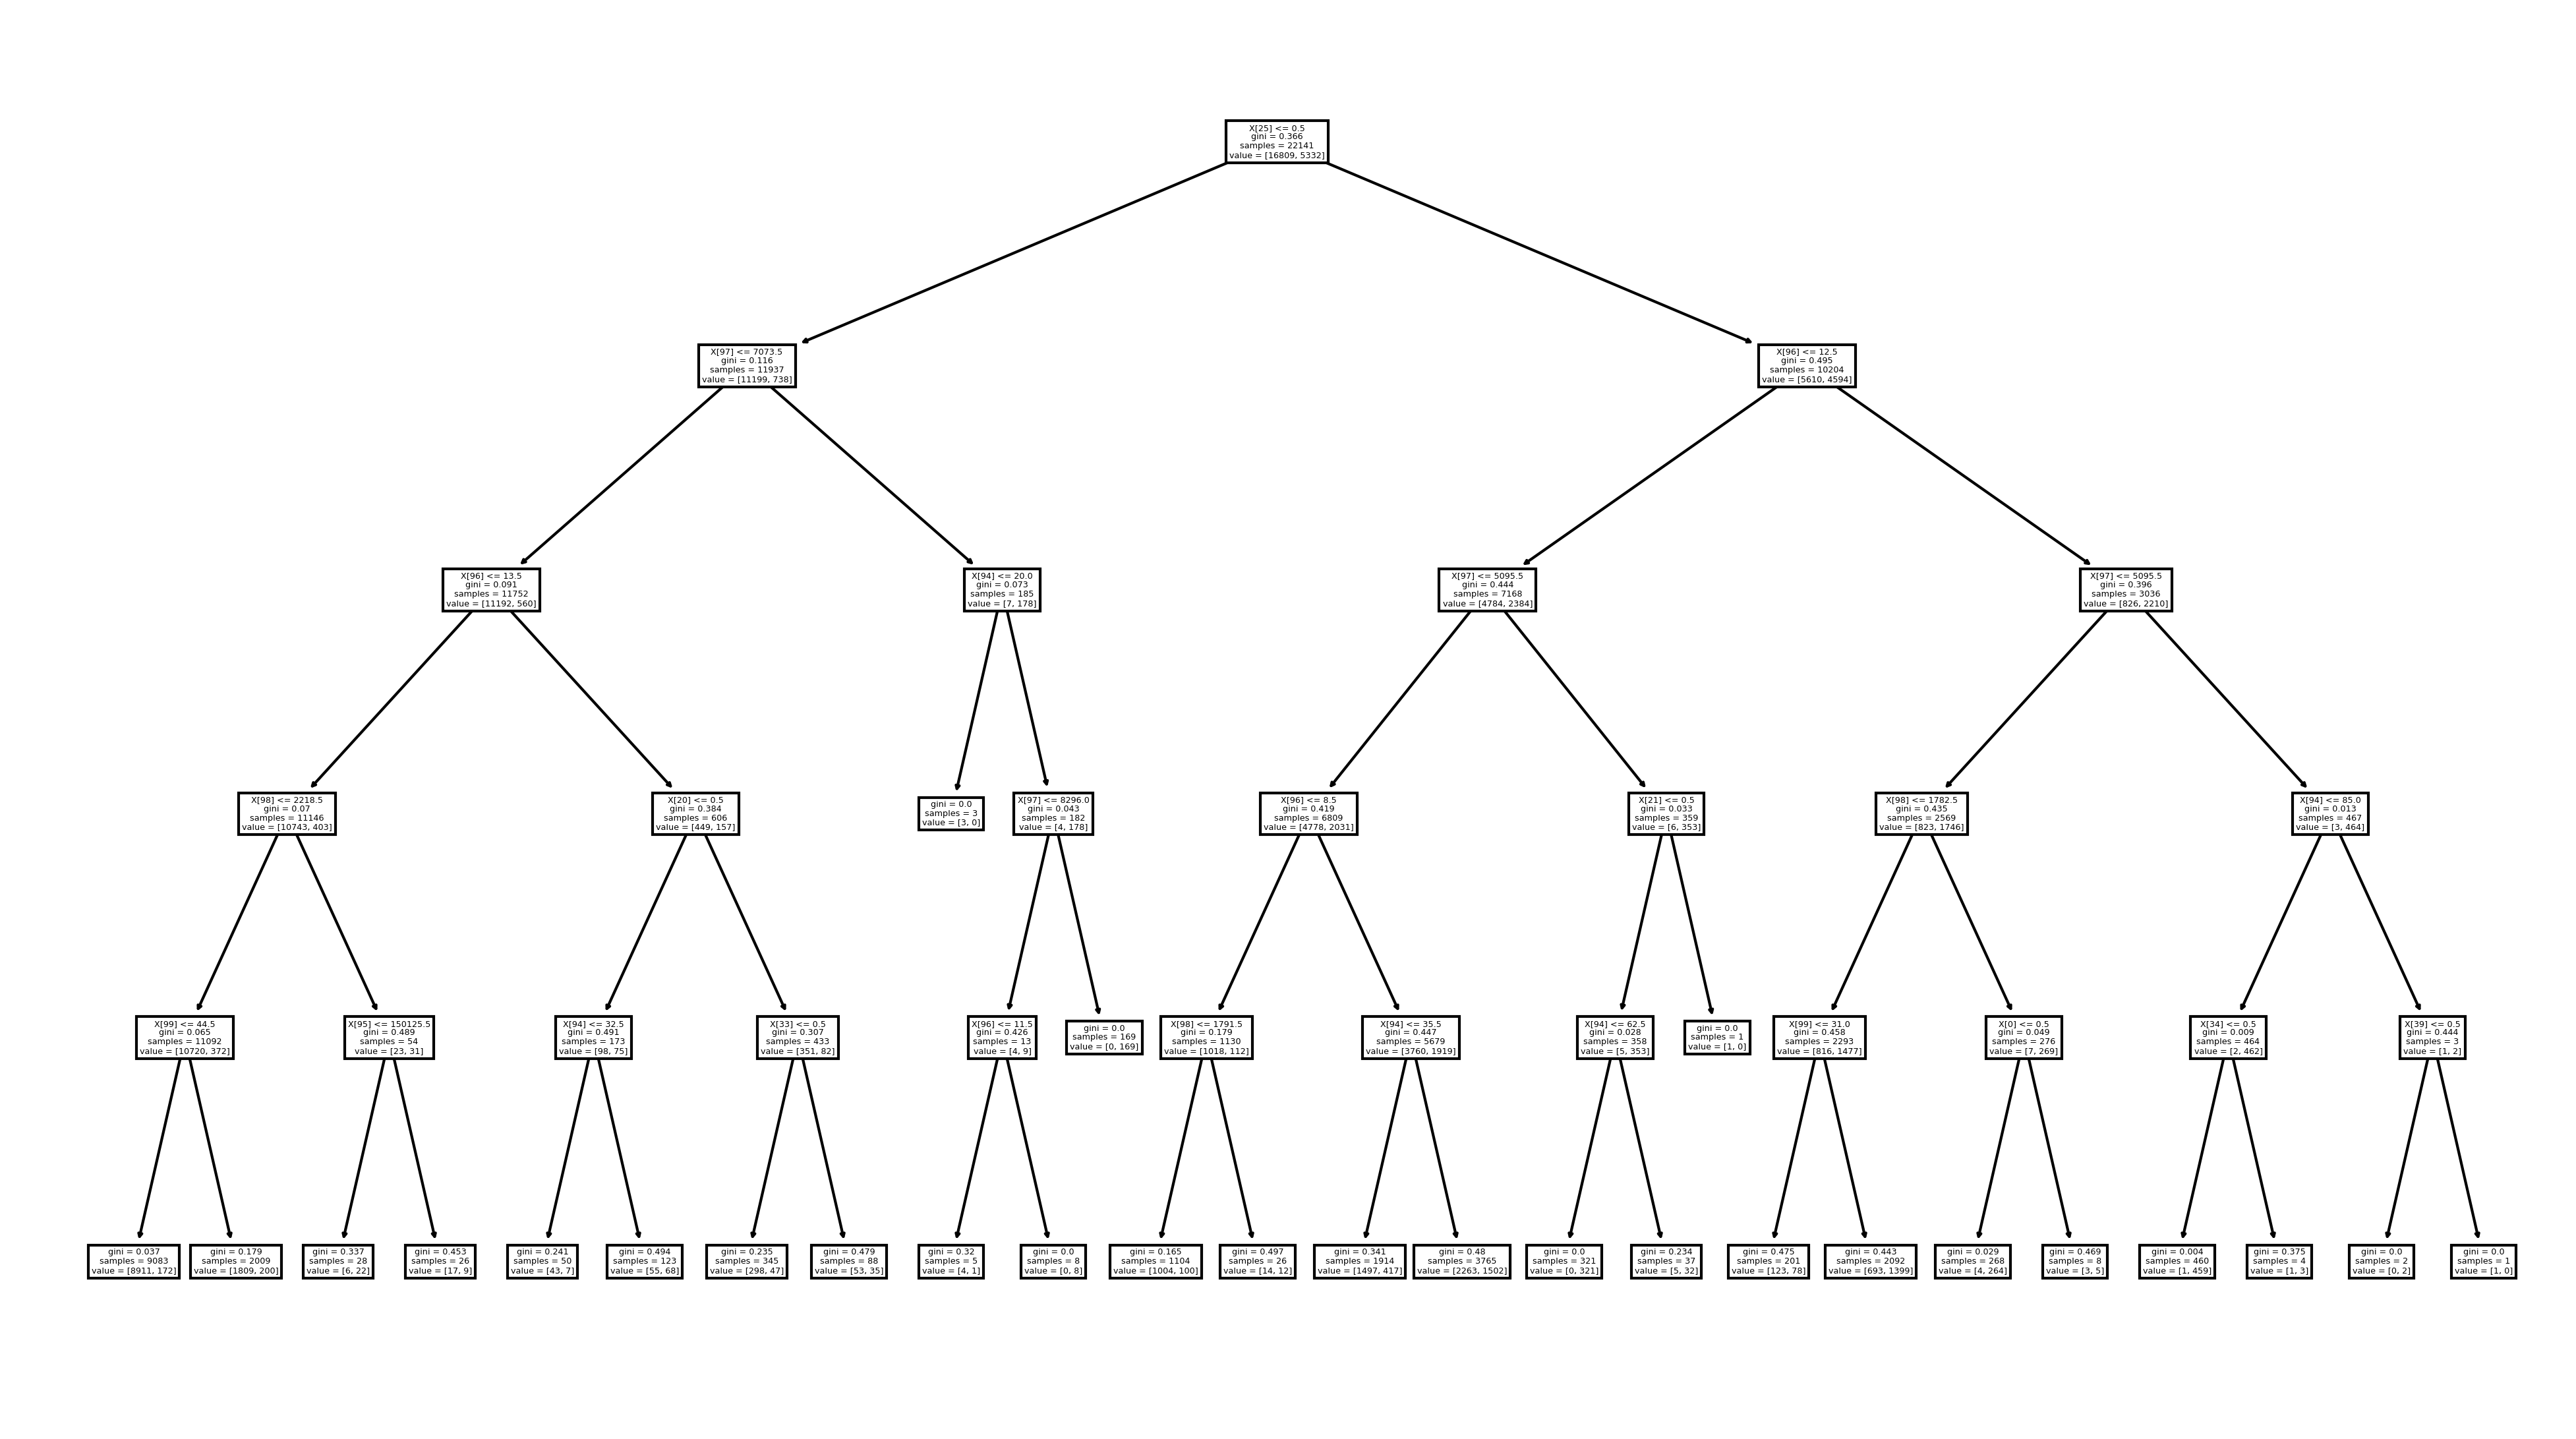

In [34]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
indexes = kf.split(X1_train, Y1_train)

fin_conf_mat_dt = np.zeros((len(np.unique(Y1_train)),len(np.unique(Y1_train))))
for train_index, test_index in indexes:
    classifier = DecisionTreeClassifier(max_depth=5)
    classifier.fit(X1_train.iloc[train_index,:], Y1_train.iloc[train_index])
    plt.figure(figsize=(16,9), dpi=300)
    tree.plot_tree(classifier)
    Y_pred = classifier.predict(X1_train.iloc[test_index,:])
    conf_mat = confusion_matrix(Y1_train.iloc[test_index], Y_pred)
    print(conf_mat)
    fin_conf_mat_dt += conf_mat
print('finalna matrica za stablo odluke je: ')
print(fin_conf_mat_dt)
print('procenat pogođenih uzoraka je: ', np.trace(fin_conf_mat_dt)/sum(sum(fin_conf_mat_dt))*100, '%')

#!conda update scikit-learn
#print(sklearn.__version__)

In [35]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
indexes = kf.split(X1_train, Y1_train)

fin_conf_mat_rf = np.zeros((len(np.unique(Y1_train)),len(np.unique(Y1_train))))
for train_index, test_index in indexes:
    classifier = RandomForestClassifier(n_estimators=50, max_depth=5)
    classifier.fit(X1_train.iloc[train_index,:], Y1_train.iloc[train_index])
    Y_pred = classifier.predict(X1_train.iloc[test_index,:])
    conf_mat = confusion_matrix(Y1_train.iloc[test_index], Y_pred)
    print(conf_mat)
    fin_conf_mat_rf += conf_mat
print('finalna matrica za random forest je: ')
print(fin_conf_mat_rf)
print('procenat pogođenih uzoraka je: ', np.trace(fin_conf_mat_rf)/sum(sum(fin_conf_mat_rf))*100, '%')

[[4073  130]
 [ 705  628]]
[[4062  140]
 [ 751  582]]
[[4011  191]
 [ 707  626]]
[[4063  139]
 [ 802  531]]
[[4098  104]
 [ 782  551]]
finalna matrica za random forest je: 
[[20307.   704.]
 [ 3747.  2918.]]
procenat pogođenih uzoraka je:  83.91747362335597 %


290


Text(0, 0.5, 'greška')

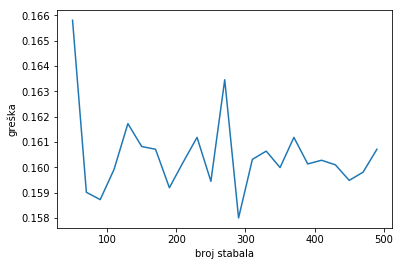

In [36]:
error_rate=[]
num_estimators = np.arange(50, 500, 20)
for i in num_estimators:
    classifier = RandomForestClassifier(n_estimators=i, max_depth=5, oob_score=True)
    classifier.fit(X1_train, Y1_train)
    oob_error = 1 - classifier.oob_score_
    error_rate.append(oob_error)
tmp = error_rate.index(min(error_rate))
print(num_estimators[tmp])
plt.plot(np.arange(50,500,20), error_rate)
plt.xlabel('broj stabala')
plt.ylabel('greška')

In [40]:
from sklearn.model_selection import GridSearchCV
parameters = {'criterion':('gini', 'entropy'), 'max_depth':[5, 10, 15], 
              'min_samples_split':[0.01, 0.05], 'class_weight':(None, 'balanced')}
dt = DecisionTreeClassifier()
clf=GridSearchCV(dt, parameters)
clf.fit(X1_train, Y1_train)
print(clf.best_score_)
print(clf.best_params_)

0.8553982538861996
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 0.01}


In [42]:
parameters = {'criterion':('gini', 'entropy'), 'max_depth':[5, 10, 15], 
              'min_samples_split':[0.01, 0.05], 'class_weight':(None, 'balanced'), 'n_estimators':[100,200,300]}
rf = RandomForestClassifier()
clf=GridSearchCV(rf, parameters)
clf.fit(X1_train, Y1_train)
print(clf.best_score_)
print(clf.best_params_)

0.857457737414561
{'class_weight': None, 'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 0.01, 'n_estimators': 200}


In [44]:
dt = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=15, min_samples_split=0.01)
dt.fit(X1_train, Y1_train)
Y_pred=dt.predict(X1_test)
conf_mat = confusion_matrix(Y1_test, Y_pred)
print(conf_mat)
print('procenat pogođenih uzoraka je: ', np.trace(conf_mat)/sum(sum(conf_mat))*100, '%')

[[3492  217]
 [ 479  697]]
procenat pogođenih uzoraka je:  85.75230296827021 %


In [46]:
dt = RandomForestClassifier(class_weight=None, criterion='gini', max_depth=15, min_samples_split=0.01, n_estimators=200)
dt.fit(X1_train, Y1_train)
Y_pred=dt.predict(X1_test)
conf_mat = confusion_matrix(Y1_test, Y_pred)
print(conf_mat)
print('procenat pogođenih uzoraka je: ', np.trace(conf_mat)/sum(sum(conf_mat))*100, '%')

[[3520  189]
 [ 521  655]]
procenat pogođenih uzoraka je:  85.46571136131014 %
